# <center> Exercise 04

### Import  libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [2]:
data = pd.read_csv('flights.csv')

### Overview

In [3]:
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [4]:
data.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air



- id: A unique identifier for each flight record in the dataset.
- year: The year in which the flight took place (2013 in this dataset).
- month: The month in which the flight took place (1 to 12).
- day: The day of the month on which the flight took place (1 to 31).
- dep_time: The actual local departure time of the flight, in 24-hour format (hhmm). 
- sched_dep_time: The scheduled local departure time of the flight, in 24-hour format (hhmm).
- dep_delay: The difference between the actual and scheduled departure times of the flight, in minutes. A positive value indicates a delayed departure, while a negative value indicates an early departure.
- arr_time: The actual local arrival time of the flight, in 24-hour format (hhmm).
- sched_arr_time: The scheduled local arrival time of the flight, in 24-hour format (hhmm).
- arr_delay: The difference between the actual and scheduled arrival times of the flight, in minutes. A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
- carrier: The two-letter code of the airline carrier for the flight.
- flight: The flight number of the flight.
- tailnum: The unique identifier of the aircraft used for the flight.
- origin: The three-letter code of the airport of origin for the flight.
- dest: The three-letter code of the destination airport for the flight.
- air_time: The duration of the flight, in minutes.
- distance: The distance between the origin and destination airports, in miles.
- hour: The hour component of the scheduled departure time, in local time.
- minute: The minute component of the scheduled departure time, in local time.
- time_hour: The scheduled departure time of the flight, in local time and format (yyyy-mm-dd hh:mm:ss).
- name: The name of the airline carrier for the flight.

### Replace the 'id' column with the index

In [5]:
data = data.set_index('id')

### Check the features

In [6]:
column_names = data.columns
column_names

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [7]:
# select columns that are not of object type
non_obj_cols = data.select_dtypes(exclude=['object']).columns
non_obj_cols

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'air_time',
       'distance', 'hour', 'minute'],
      dtype='object')

In [8]:
# get the number of selected columns
num_non_obj_cols = len(non_obj_cols)
print(f"The number of non-object columns is: {num_non_obj_cols}")

The number of non-object columns is: 14


In [9]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [10]:

data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000




1. Mode: The mode of the flight distances is the most frequently occurring value or bin in the distribution of distances. It is a measure of the central tendency of the data that can help identify the most common distance traveled by flights in the dataset.

2. Range: The range of the flight distances is the difference between the maximum and minimum values or bins within the data distribution. It provides an indication of the spread of the data and how much variation exists in the distances traveled by flights.

3. Interquartile Range (IQR): The IQR is a measure of the spread of the data that is less sensitive to outliers than the range or standard deviation. It is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. In a histogram, the quartiles can be estimated by dividing the data into four equally sized groups. The IQR can help identify the middle 50% of the data and provide a measure of variability that is more robust to extreme values.

4. Skewness: Skewness is a measure of the symmetry of the data distribution. It measures the extent to which the histogram is skewed to the left or right. A positive skewness value indicates that the histogram is skewed to the right, meaning that there are more values or bins on the left side of the distribution and a long tail on the right. A negative skewness value indicates that the histogram is skewed to the left, meaning that there are more values or bins on the right side of the distribution and a long tail on the left.

5. Kurtosis: Kurtosis is a measure of the peakedness of the data distribution. It measures the extent to which the histogram is more or less peaked than a normal distribution. A positive kurtosis value indicates that the histogram is more peaked than a normal distribution, meaning that there are more values or bins in the tails of the distribution and fewer in the center. A negative kurtosis value indicates that the histogram is less peaked than a normal distribution, meaning that there are more values or bins in the center of the distribution and fewer in the tails.

### Calculate these measures for the flight distances

In [11]:
# use [0] to extract the first value of the mode Series
mode = data['distance'].mode()[0]


ranges = data['distance'].max() - data['distance'].min()

# calculate the 25th and 75th percentiles
quartiles = np.percentile(data['distance'], [25, 75]) 
IQR = quartiles[1] - quartiles[0]


skewness = sp.stats.skew(data['distance'])


kurtosis = sp.stats.kurtosis(data['distance'])

print(f"Mode of flight distances: {mode}")
print(50*'-')
print(f"Range of flight distances: {ranges}")
print(50*'-')
print(f"IQR of flight distances: {IQR}")
print(50*'-')
print(f"Skewness of flight distances: {skewness}")
print(50*'-')
print(f"Kurtosis of flight distances: {kurtosis}")

Mode of flight distances: 2475
--------------------------------------------------
Range of flight distances: 4966
--------------------------------------------------
IQR of flight distances: 887.0
--------------------------------------------------
Skewness of flight distances: 1.1286851238552507
--------------------------------------------------
Kurtosis of flight distances: 1.193604368532454


### Correlation matrix

In [12]:
# display the correlation matrix
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834,0.010924,0.021636,-0.005227,0.015528
day,NaN,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,NaN,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,NaN,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,NaN,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,NaN,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,NaN,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,NaN,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522
flight,NaN,-0.000834,-0.001791,0.041957,0.036495,0.054734,0.025042,0.021594,0.072862,1.000000,-0.472838,-0.484165,0.035838,0.018137




The reason why the correlation coefficient for the year feature is NaN is that the year column contains only a single value (2013) in the dataset. When all the values in a column are constant, the standard deviation of the column is zero, which means that the correlation coefficient between this column and any other column is undefined (including itself). Therefore, the year column has no predictive power for any other column in the dataset, and it can be safely dropped without affecting the other columns. In other words, the year feature does not provide any useful information for modeling or analyzing the relationships between the other features in the dataset.

#### Drop 'year' column

In [13]:
# New dataset without year column
data = data.drop('year', axis=1)

# display the new correlation matrix
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
month,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834,0.010924,0.021636,-0.005227,0.015528
day,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522
flight,-0.000834,-0.001791,0.041957,0.036495,0.054734,0.025042,0.021594,0.072862,1.000000,-0.472838,-0.484165,0.035838,0.018137
air_time,0.010924,0.002236,-0.014619,-0.015532,-0.022405,0.054296,0.078918,-0.035297,-0.472838,1.000000,0.990650,-0.016277,0.017032


<Axes: >

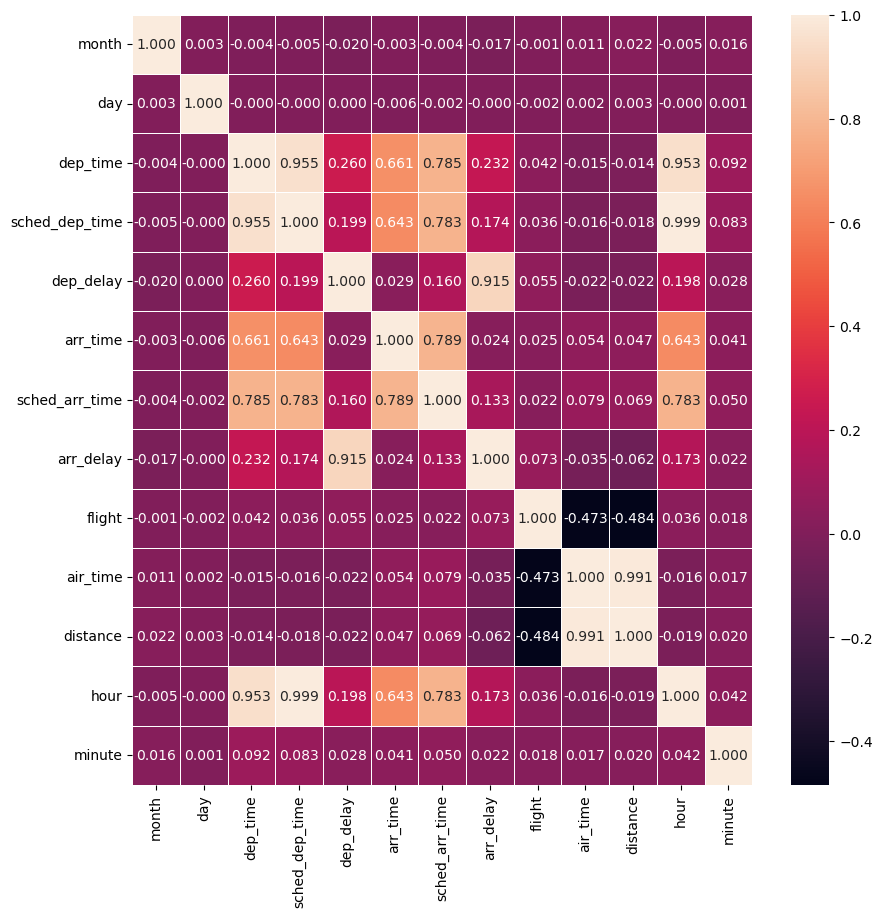

In [14]:
# plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", linewidth=.5)

In [15]:
corr_matrix['month']

month             1.000000
day               0.002942
dep_time         -0.003932
sched_dep_time   -0.004573
dep_delay        -0.020057
arr_time         -0.002520
sched_arr_time   -0.004173
arr_delay        -0.017382
flight           -0.000834
air_time          0.010924
distance          0.021636
hour             -0.005227
minute            0.015528
Name: month, dtype: float64

In [16]:
corr_matrix['distance']

month             0.021636
day               0.003041
dep_time         -0.013998
sched_dep_time   -0.017995
dep_delay        -0.021671
arr_time          0.046991
sched_arr_time    0.068726
arr_delay        -0.061868
flight           -0.484165
air_time          0.990650
distance          1.000000
hour             -0.018860
minute            0.019780
Name: distance, dtype: float64

### Distance explanation

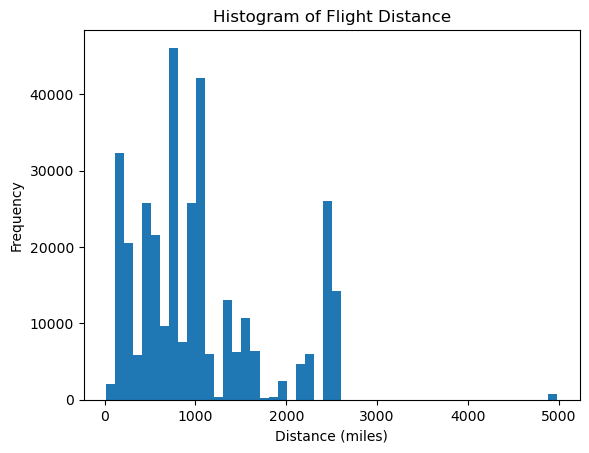

In [17]:
# create a histogram of the flight duration column
plt.hist(data['distance'], bins=50)

# set the title and axis labels
plt.title('Histogram of Flight Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# show the plot
plt.show()

#### Result:
This above plot shows that most flights were less than 1000 miles.

### On-time Departure and Arrival Rates by Airport

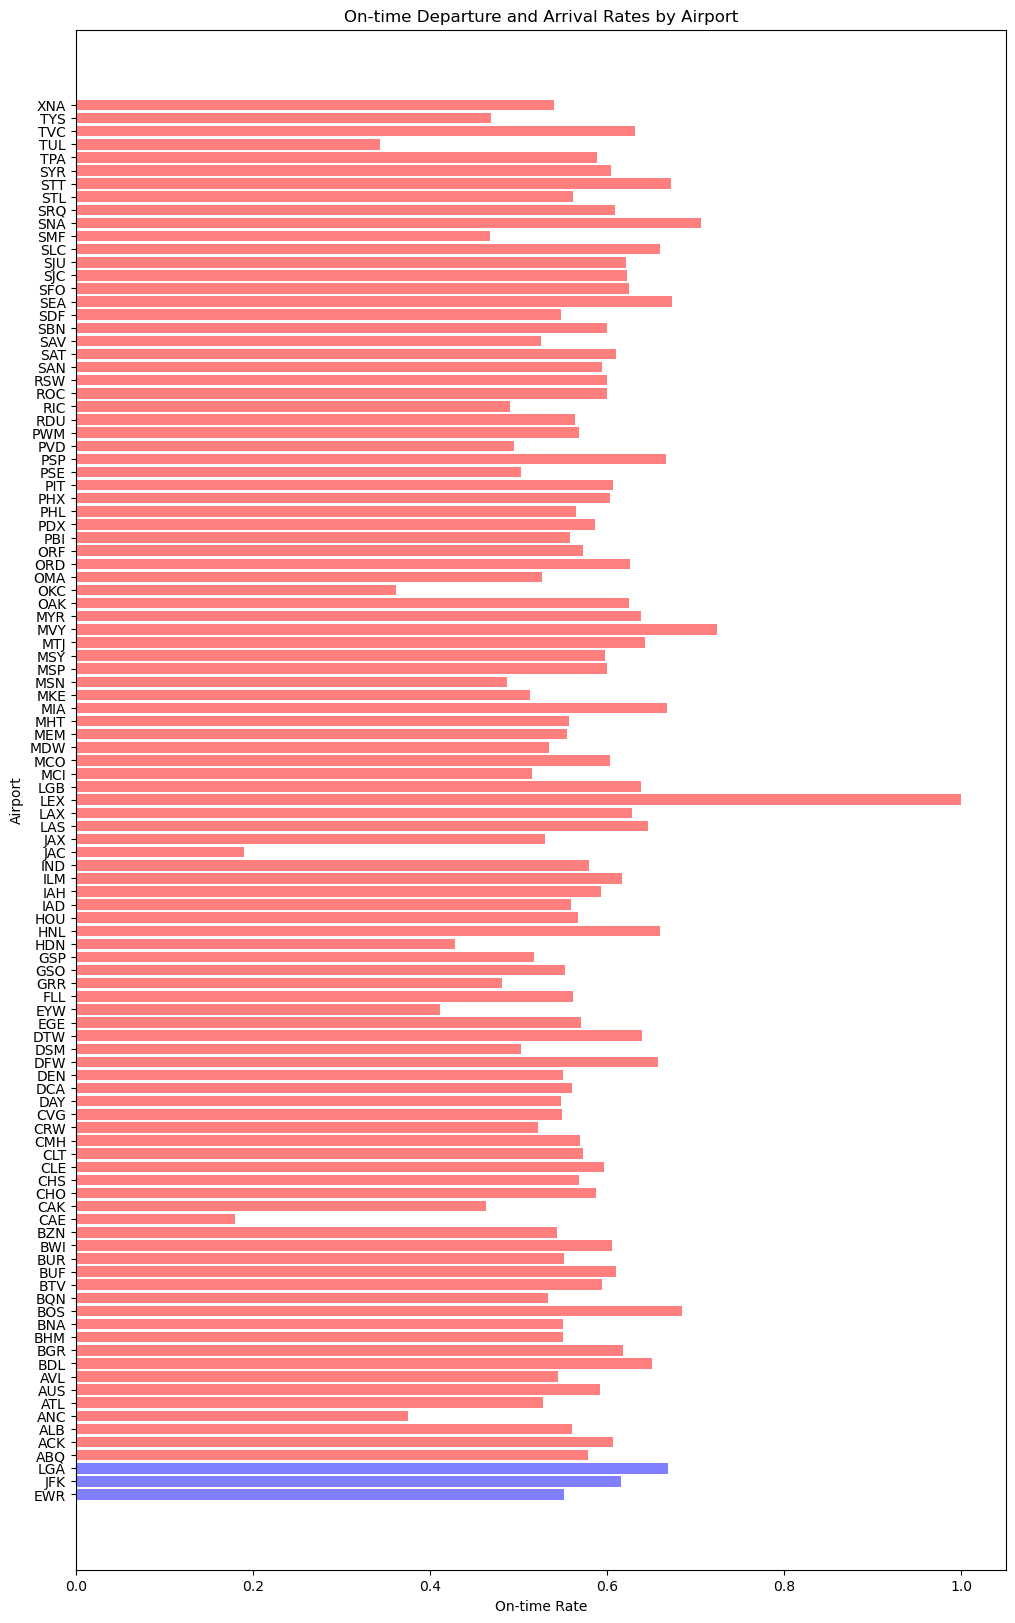

In [18]:
# calculate the on-time departure rate for each airport
dep_on_time = data[data['dep_delay'] <= 0].groupby('origin')\
['dep_delay'].count() / data.groupby('origin')['dep_delay'].count()

# calculate the on-time arrival rate for each airport
arr_on_time = data[data['arr_delay'] <= 0].groupby('dest')\
['arr_delay'].count() / data.groupby('dest')['arr_delay'].count()

# create a horizontal bar chart of the on-time departure and arrival rates
fig, ax = plt.subplots(figsize=(12, 20))
ax.barh(dep_on_time.index, dep_on_time, 
        color='b', alpha=0.5, 
        label='On-time Departure', align='center')
ax.barh(arr_on_time.index, arr_on_time, 
        color='r', alpha=0.5, 
        label='On-time Arrival', align='center')

# set the title and axis labels
ax.set_title('On-time Departure and Arrival Rates by Airport')
ax.set_xlabel('On-time Rate')
ax.set_ylabel('Airport')

# show the plot
plt.show()

#### Result:


The resulting plot displays the on-time departure and arrival rates for each airport in the dataset. The airports are sorted by on-time departure rate from highest to lowest, with the x-axis representing the airports and the y-axis representing the percentage of on-time departures and arrivals. The on-time rates range from approximately 50% to 100%, indicating that some airports have significantly higher on-time rates than others. The plot can be used to quickly identify which airports have the highest and lowest on-time rates and to compare the performance of different airports in terms of on-time departures and arrivals. By analyzing this plot, stakeholders can gain insights into which airports may need improvements in their operations to increase on-time rates and provide better service to passengers.

### Flight Distance vs Air Time

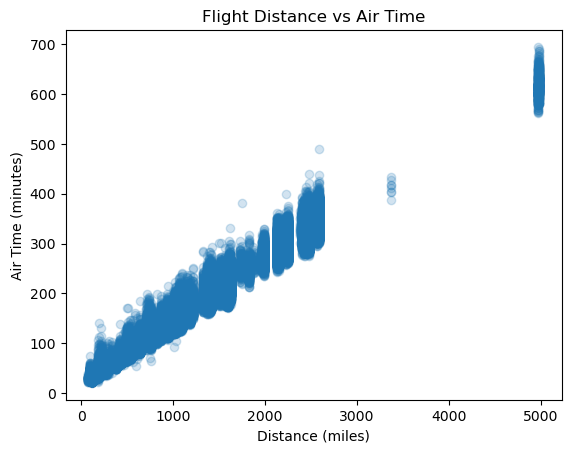

In [19]:
# create a scatter plot of flight distance vs. air time
plt.scatter(data['distance'], data['air_time'], alpha=0.2)

# set the title and axis labels
plt.title('Flight Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')

# show the plot
plt.show()

#### Result:


The plot can help identify patterns or trends in the data, such as whether there is a relationship between flight distance and air time. The plot can also reveal any outliers or anomalies in the data, such as flights with unusually long air times or flights that do not follow the expected pattern. Additionally, the plot can help detect any potential issues with the data, such as missing values or incorrect data entries. By examining the relationship between flight distance and air time, stakeholders can gain insights into how long flights typically take and how well airlines are meeting their scheduled arrival times. These insights can be used to inform decisions related to scheduling, pricing, and operational improvements.